In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from keras.models import Sequential 
from keras.layers import Dense

In [2]:
# Cargar los datos
data = pd.read_csv("data_evaluacion.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       48842 non-null  int64 
 1   1       48842 non-null  object
 2   2       48842 non-null  int64 
 3   3       48842 non-null  object
 4   4       48842 non-null  int64 
 5   5       48842 non-null  object
 6   6       48842 non-null  object
 7   7       48842 non-null  object
 8   8       48842 non-null  object
 9   9       48842 non-null  object
 10  10      48842 non-null  int64 
 11  11      48842 non-null  int64 
 12  12      48842 non-null  int64 
 13  13      48842 non-null  object
 14  14      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
etiquetas = ['edad', 'tipo_empleado', 'fnlwgt', 'educacion', 'educacion_num', 
                 'estado_civil', 'ocupacion', 'relacion', 'raza', 'sexo', 
                 'capital_ganado', 'capital_perdido', 'hr_por_semana', 'pais', 'ganancia']

In [5]:
#Establecemos etiquetas
data.columns = etiquetas

In [6]:
data

,edad,tipo_empleado,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relacion,raza,sexo,capital_ganado,capital_perdido,hr_por_semana,pais,ganancia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [7]:
data.describe()

,edad,fnlwgt,educacion_num,capital_ganado,capital_perdido,hr_por_semana
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
def obtener_categorias(data , categoria):
    # Crear un diccionario para almacenar las categorías
    categorias = data[categoria].unique()
    return categorias



In [9]:
tiposEmpleado=obtener_categorias(data , 'tipo_empleado') 
tiposEducacion=obtener_categorias(data , 'educacion')
tiposestadocivil=obtener_categorias(data , 'estado_civil')
tiposocupacion=obtener_categorias(data , 'ocupacion')
tiposrelacion=obtener_categorias(data , 'relacion')
tiposraza=obtener_categorias(data , 'raza')
tiposmale=obtener_categorias(data , 'sexo')
tipospais=obtener_categorias(data , 'pais')
tiposganancia=obtener_categorias(data , 'ganancia')
print(tiposEmpleado)
print(tiposEducacion)
print(tiposestadocivil)
print(tiposocupacion)
print(tiposrelacion)
print(tiposraza)
print(tiposmale)
print(tiposganancia)

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['<=50K' '>50K']


In [10]:
def categorize_employment(job_category):
    """
    Categoriza el tipo de empleo dado en una categoría numérica.
    """
    if job_category in ['State-gov', 'Federal-gov', 'Local-gov']:
        return 1  # Empleo Gubernamental
    elif job_category == 'Private':
        return 2  # Empleo Privado
    elif job_category in ['Self-emp-not-inc', 'Self-emp-inc']:
        return 3  # Empleo Independiente
    elif job_category == 'Without-pay':
        return 4  # Trabajo No Remunerado
    elif job_category == 'Never-worked':
        return 5  # No Empleo
    else:
        return np.nan  # Representa un dato desconocido

# Reemplazar las categorías en el DataFrame con valores numéricos
data['tipo_empleado'] = data['tipo_empleado'].apply(categorize_employment)
data['tipo_empleado'] = data['tipo_empleado'].astype('Int32')


In [11]:
def categorize_sex(sex_category):
    """
    Categoriza el sexo dado en una categoría numérica específica.
    """
    if sex_category == 'Male':
        return 1
    elif sex_category == 'Female':
        return 2
    else:
        return pd.NA  # Representa un dato desconocido

# Reemplazar las categorías en el DataFrame con valores numéricos y NA
data['sexo'] = data['sexo'].apply(categorize_sex)

# Convertir la columna a tipo entero que permite NA
data['sexo'] = data['sexo'].astype('Int32')

In [12]:
def categorize_continent(country_category):
    """
    Categoriza el país dado en una categoría numérica de continente.
    
    """
    if country_category in ['United-States', 'Canada', 'Mexico', 'Puerto-Rico', 'Outlying-US(Guam-USVI-etc)']:
        return 1  # América del Norte
    elif country_category in ['Cuba', 'Jamaica', 'Honduras', 'Columbia', 'Ecuador', 'Haiti', 
                              'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Peru', 
                              'Nicaragua', 'Trinadad&Tobago']:
        return 2  # América Latina y el Caribe
    elif country_category in ['England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 
                              'Scotland', 'Ireland', 'Hungary', 'Greece', 'Netherlands', 
                              'Yugoslavia']:
        return 3  # Europa
    elif country_category in ['India', 'Iran', 'Philippines', 'Cambodia', 'Thailand', 'Laos', 
                              'Taiwan', 'China', 'Japan', 'Vietnam', 'Hong']:
        return 4  # Asia
    elif country_category in ['South', 'Nigeria']:
        return 5  # África
    else:
        return pd.NA  # Representa un dato desconocido

# Reemplazar las categorías en el DataFrame con valores numéricos agrupados por continente y NA
data['pais'] = data['pais'].apply(categorize_continent)

# Convertir la columna a tipo entero que permite NA
data['pais'] = data['pais'].astype('Int32')

In [13]:
def categorize_relationship(relationship_category):
    """
    Categoriza la relación dada en una categoría numérica específica.
    """
    if relationship_category == 'Not-in-family':
        return 1
    elif relationship_category == 'Husband':
        return 2
    elif relationship_category == 'Wife':
        return 3
    elif relationship_category == 'Own-child':
        return 4
    elif relationship_category == 'Unmarried':
        return 5
    elif relationship_category == 'Other-relative':
        return 6
    else:
        return pd.NA  # Representa un dato desconocido

# Reemplazar las categorías en el DataFrame con valores numéricos y NA
data['relacion'] = data['relacion'].apply(categorize_relationship)

# Convertir la columna a tipo entero que permite NA
data['relacion'] = data['relacion'].astype('Int32')

In [14]:
def categorize_civil_status(civil_status_category):
    """
    Categoriza el estado civil dado en una categoría numérica agrupada.
    
    """
    if civil_status_category in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 1  # Casado
    elif civil_status_category in ['Never-married', 'Separated']:
        return 2  # No Casado
    elif civil_status_category == 'Divorced':
        return 3  # Divorciado
    elif civil_status_category == 'Widowed':
        return 4  # Viudo
    else:
        return pd.NA  # Representa un dato desconocido

# Reemplazar las categorías en el DataFrame con valores numéricos agrupados y NA
data['estado_civil'] = data['estado_civil'].apply(categorize_civil_status)

# Convertir la columna a tipo entero que permite NA
data['estado_civil'] = data['estado_civil'].astype('Int32')

In [15]:
def categorize_race(race_category):
    """
    Categoriza la raza dada en una categoría numérica específica.
    """
    if race_category == 'White':
        return 1
    elif race_category == 'Black':
        return 2
    elif race_category == 'Asian-Pac-Islander':
        return 3
    elif race_category == 'Amer-Indian-Eskimo':
        return 4
    elif race_category == 'Other':
        return 5
    else:
        return pd.NA  # Representa un dato desconocido

# Reemplazar las categorías en el DataFrame con valores numéricos y NA
data['raza'] = data['raza'].apply(categorize_race)

# Convertir la columna a tipo entero que permite NA
data['raza'] = data['raza'].astype('Int32')

In [16]:

def categorize_education(education_category):
    """
    Agrupa el nivel de educación dado en una categoría numérica más amplia.
    
    :param education_category: str, categoría de educación a agrupar
    :return: int o pd.NA, categoría combinada en formato numérico o NA
    """
    if education_category in ['Preschool', '1st-4th', '5th-6th', '7th-8th']:
        return 1  # Educación Básica
    elif education_category in ['HS-grad', '9th', '10th', '11th', '12th']:
        return 2  # Educación Secundaria
    elif education_category in ['Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors']:
        return 3  # Educación Técnica
    elif education_category in ['Prof-school', 'Masters', 'Doctorate']:
        return 4  # Educación Superior
    else:
        return pd.NA  # Representa un dato desconocido

# Reemplazar las categorías en el DataFrame con valores numéricos agrupados y NA
data['educacion'] = data['educacion'].apply(categorize_education)

# Convertir la columna a tipo entero que permite NA
data['educacion'] = data['educacion'].astype('Int32')



In [17]:
def categorize_income(income_category):
    """
    Categoriza la ganancia dada en una categoría numérica específica.
    

    """
    if income_category == '<=50K':
        return 1
    elif income_category == '>50K':
        return 2
    else:
        return pd.NA  # Representa un dato desconocido

# Reemplazar las categorías en el DataFrame con valores numéricos y NA
data['ganancia'] = data['ganancia'].apply(categorize_income)

# Convertir la columna a tipo entero que permite NA
data['ganancia'] = data['ganancia'].astype('Int32')

In [18]:


def categorize_occupation(occupation_category):
    """
    Agrupa la ocupación dada en una categoría numérica más amplia.
    
    :param occupation_category: str, categoría de ocupación a agrupar
    :return: int o pd.NA, categoría combinada en formato numérico o NA
    """
    if occupation_category in ['Adm-clerical', 'Exec-managerial']:
        return 1  # Administración y Oficina
    elif occupation_category in ['Handlers-cleaners', 'Other-service', 'Sales', 'Tech-support', 'Priv-house-serv']:
        return 2  # Servicios
    elif occupation_category in ['Prof-specialty', 'Protective-serv']:
        return 3  # Especialidades Profesionales
    elif occupation_category in ['Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct']:
        return 4  # Mano de Obra y Transporte
    elif occupation_category == 'Armed-Forces':
        return 5  # Fuerzas Armadas
    else:
        return pd.NA  # Representa un dato desconocido

# Reemplazar las categorías en el DataFrame con valores numéricos agrupados y NA
data['ocupacion'] = data['ocupacion'].apply(categorize_occupation)

# Convertir la columna a tipo entero que permite NA
data['ocupacion'] = data['ocupacion'].astype('Int32')




In [19]:
data

,edad,tipo_empleado,fnlwgt,educacion,educacion_num,estado_civil,ocupacion,relacion,raza,sexo,capital_ganado,capital_perdido,hr_por_semana,pais,ganancia
0,39,1,77516,3,13,2,1,1,1,1,2174,0,40,1,1
1,50,3,83311,3,13,1,1,2,1,1,0,0,13,1,1
2,38,2,215646,2,9,3,2,1,1,1,0,0,40,1,1
3,53,2,234721,2,7,1,2,2,2,1,0,0,40,1,1
4,28,2,338409,3,13,1,3,3,2,2,0,0,40,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,2,215419,3,13,3,3,1,1,2,0,0,36,1,1
48838,64,<NA>,321403,2,9,4,<NA>,6,2,1,0,0,40,1,1
48839,38,2,374983,3,13,1,3,2,1,1,0,0,50,1,1
48840,44,2,83891,3,13,3,1,4,3,1,5455,0,40,1,1


edad                  0
tipo_empleado      2799
fnlwgt                0
educacion             0
educacion_num         0
estado_civil          0
ocupacion          2809
relacion              0
raza                  0
sexo                  0
capital_ganado        0
capital_perdido       0
hr_por_semana         0
pais                858
ganancia              0
dtype: int64


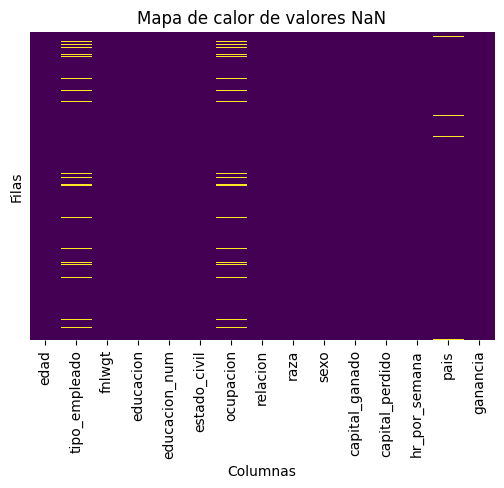

In [20]:
nan_counts = data.isnull().sum()
print(nan_counts)
columnas_con_nan = nan_counts[nan_counts > 0].index.tolist()
nan_heatmap = data.isna()

# Configurar el tamaño de la figura
plt.figure(figsize=(6,4))

# Crear el heatmap
sns.heatmap(nan_heatmap, cbar=False, cmap='viridis', yticklabels=False, xticklabels=True)
plt.title('Mapa de calor de valores NaN')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

In [21]:
data['tipo_empleado'].fillna(data['tipo_empleado'].mode()[0], inplace=True)
data['ocupacion'].fillna(data['ocupacion'].mode()[0], inplace=True)
data['pais'].fillna(data['pais'].mode()[0], inplace=True)


C:\Users\johan\AppData\Local\Temp\ipykernel_22532\2991600480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['tipo_empleado'].fillna(data['tipo_empleado'].mode()[0], inplace=True)
C:\Users\johan\AppData\Local\Temp\ipykernel_22532\2991600480.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

edad               0
tipo_empleado      0
fnlwgt             0
educacion          0
educacion_num      0
estado_civil       0
ocupacion          0
relacion           0
raza               0
sexo               0
capital_ganado     0
capital_perdido    0
hr_por_semana      0
pais               0
ganancia           0
dtype: int64


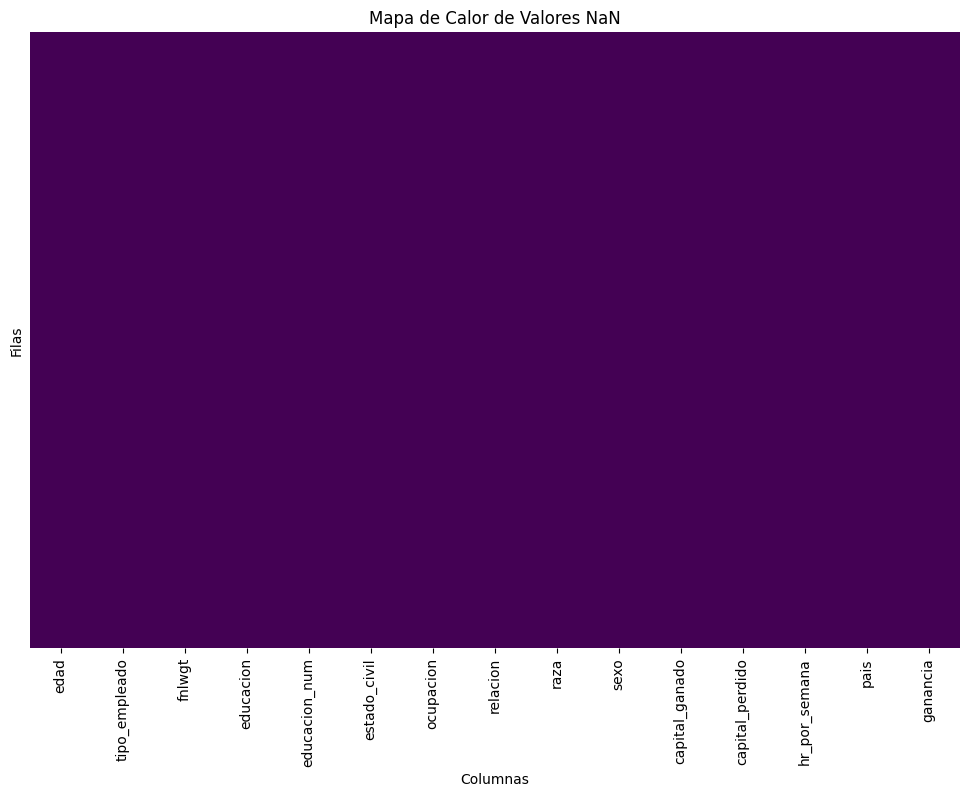

In [22]:
nan_counts = data.isnull().sum()
print(nan_counts)
nan_heatmap = data.isna()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(nan_heatmap, cbar=False, cmap='viridis', yticklabels=False, xticklabels=True)
plt.title('Mapa de Calor de Valores NaN')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

In [23]:
X = data.drop(['ganancia'], axis=1)
y = data['ganancia']

In [24]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [25]:
# Division de la data
X_train,X_test, y_train,y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [26]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [27]:
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [28]:
modelo = Sequential()
modelo.add(Dense(32,input_dim=X_train.shape[1], activation='relu'))
modelo.add(Dense(16,activation='relu'))
#Salida
modelo.add(Dense(3,activation='softmax')) # Cambiado a softmax para clasificación multiclase
modelo.compile(
    loss="sparse_categorical_crossentropy",  # Cambiado a categorical_crossentropy
    optimizer="adam",
    metrics=["accuracy"]
)

c:\Users\johan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
historial = modelo.fit(X_train, y_train, batch_size=32, epochs=50) 


Epoch 1/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.7580 - loss: 0.5422
Epoch 2/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.8476 - loss: 0.3286
Epoch 3/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8484 - loss: 0.3245
Epoch 4/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - accuracy: 0.8513 - loss: 0.3183
Epoch 5/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - accuracy: 0.8520 - loss: 0.3180
Epoch 6/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.8504 - loss: 0.3145
Epoch 7/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.8499 - loss: 0.3151
Epoch 8/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.8525 - loss: 0.3167
Epoch 9/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.8526 - loss: 0.3112
Epoch 10/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - accuracy: 0.8515 - loss: 0.3149
Epoch 11/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.8574 - loss: 0.3099
Epoch 12

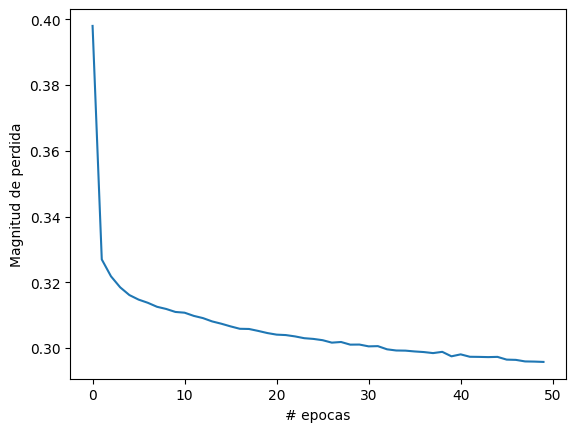

In [30]:
plt.xlabel("# epocas")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [31]:
modelo.evaluate(X_test, y_test)


458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.8495 - loss: 0.3303


[0.3293977379798889, 0.8510885238647461]

In [32]:
# Hacer predicciones
y_prob = modelo.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)  # Convertir probabilidades a etiquetas de clase

# Crear DataFrame de predicciones
y_pred_df = pd.DataFrame(y_pred, columns=['Estimacion'])

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step


In [33]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

Reporte de Clasificación:
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.91     11109
        >50K       0.76      0.57      0.65      3544

    accuracy                           0.85     14653
   macro avg       0.81      0.75      0.78     14653
weighted avg       0.84      0.85      0.84     14653



In [37]:
train_loss, train_accuracy = modelo.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = modelo.evaluate(X_test, y_test, verbose=0)

# Imprimir precisión en el conjunto de entrenamiento y prueba
print('Train Accuracy : %.5f' % train_accuracy)
print('Test Accuracy : %.5f' % test_accuracy)
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Train Accuracy : 0.86148
Test Accuracy : 0.85109
Precisión del modelo: 0.8510885142974135


In [34]:
estimar = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test, columns=['Real']), y_pred_df], axis=1)
print(estimar)

           edad  tipo_empleado    fnlwgt  educacion  educacion_num  \
7762  -1.505691       0.037592  2.209786  -0.853335      -0.419335   
23881 -1.578629       0.037592 -0.101428  -0.853335      -0.808297   
30507 -0.995129      -1.958149  1.508688  -0.853335      -0.419335   
28911 -1.359816       0.037592  0.270360   0.586787      -0.030373   
19484  0.609496       0.037592  0.514767  -0.853335      -0.419335   
...         ...            ...       ...        ...            ...   
14648       NaN            NaN       NaN        NaN            NaN   
14649       NaN            NaN       NaN        NaN            NaN   
14650       NaN            NaN       NaN        NaN            NaN   
14651       NaN            NaN       NaN        NaN            NaN   
14652       NaN            NaN       NaN        NaN            NaN   

       estado_civil  ocupacion  relacion      raza     sexo  capital_ganado  \
7762        0.33786  -0.391661 -1.068464 -0.352026 -0.70422       -0.144804   
2

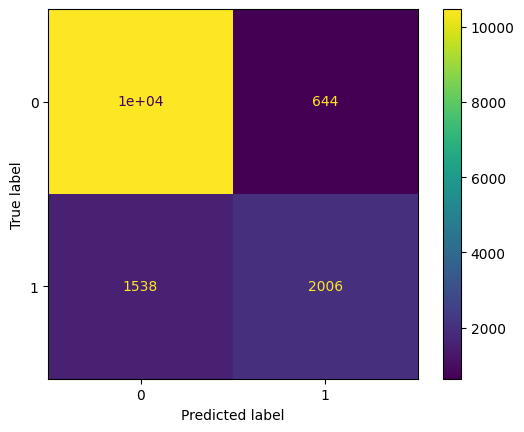

In [35]:
disp=ConfusionMatrixDisplay(confusion_matrix(pd.DataFrame(y_test),y_pred_df))
disp.plot()